In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

In [5]:
X

array([[ 0.09178048, -0.50006739],
       [ 2.06188329, -0.37005551],
       [ 0.54749584, -0.68109756],
       [ 0.33964786,  0.39772099],
       [ 0.14223227,  0.8886361 ],
       [-1.4323299 ,  0.96587043],
       [ 0.66569665, -0.18096569],
       [-0.86997459,  0.47048505],
       [-0.5097476 ,  0.49258537],
       [ 0.14105072,  0.61660069],
       [ 1.2765134 ,  0.19396224],
       [ 1.597704  , -0.15086917],
       [ 1.77418856,  0.01032202],
       [ 0.63147221, -1.05449646],
       [-0.62519474,  1.02781705],
       [ 1.78808665, -0.21319224],
       [-0.63455223,  0.66537255],
       [ 0.24507211,  0.74827693],
       [ 0.61192272, -0.32195517],
       [ 0.63347262,  1.1470217 ],
       [-0.35083135,  0.43534168],
       [ 1.92461085,  0.26255443],
       [ 0.59389043,  0.68869427],
       [ 0.71034769, -0.49016124],
       [ 0.13765272,  1.10594912],
       [ 1.45931422, -0.43329846],
       [ 0.63261727,  0.5956975 ],
       [ 1.85865193, -0.42402225],
       [-0.78845314,

In [6]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,

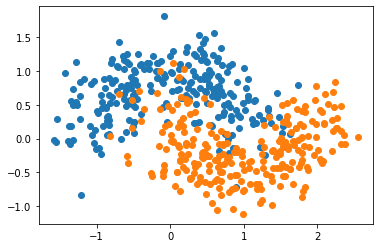

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [10]:
type(X_train)

numpy.ndarray

In [12]:
X_train.shape

(375, 2)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

### 逻辑回归

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_reg.score(X_test, y_test)

0.872

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### 多项式逻辑回归

In [46]:
def PolynomialLogisticRegression(degree, C=1.0, penalty='l2', solver='lbfgs'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, solver=solver))
    ])

In [26]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [27]:
poly_log_reg.score(X_test, y_test)

0.864

In [28]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)
poly_log_reg2.score(X_test, y_test)

0.896

In [38]:
poly_log_reg3 = PolynomialLogisticRegression(degree=30)
poly_log_reg3.fit(X_train, y_train)
poly_log_reg3.score(X_test, y_test)

0.896

In [39]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg4.fit(X_train, y_train)
poly_log_reg4.score(X_test, y_test)

0.888

### 绘制决策边界

In [33]:
def plot_decision_boundary(model,axis):
    
    x0,x1 = np.meshgrid(  
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth =5,cmap=custom_cmap)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


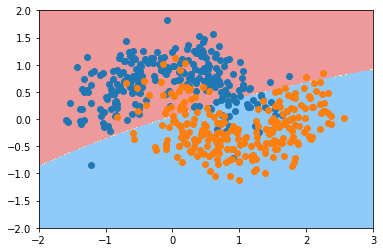

In [35]:
plot_decision_boundary(poly_log_reg, axis=[-2, 3, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


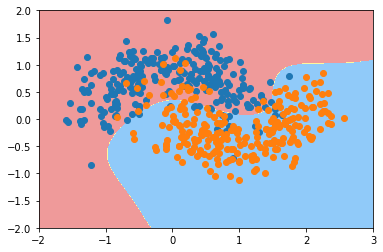

In [36]:
plot_decision_boundary(poly_log_reg2, axis=[-2, 3, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


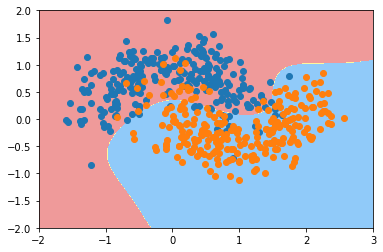

In [40]:
plot_decision_boundary(poly_log_reg3, axis=[-2, 3, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


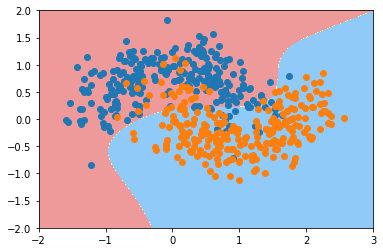

In [41]:
plot_decision_boundary(poly_log_reg4, axis=[-2, 3, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [43]:
poly_log_reg5 = PolynomialLogisticRegression(degree=10)
poly_log_reg5.fit(X_train, y_train)
poly_log_reg5.score(X_test, y_test)

0.888

In [47]:
poly_log_reg6 = PolynomialLogisticRegression(degree=20, penalty='l1', solver='liblinear')
poly_log_reg6.fit(X_train, y_train)
poly_log_reg6.score(X_test, y_test)

0.896

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


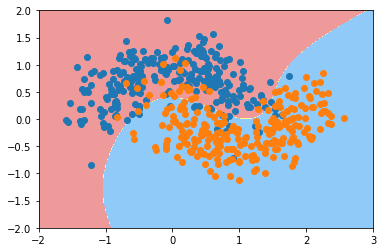

In [48]:
plot_decision_boundary(poly_log_reg6, axis=[-2, 3, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [49]:
poly_log_reg7 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1', solver='liblinear')
poly_log_reg7.fit(X_train, y_train)
poly_log_reg7.score(X_test, y_test)

0.864

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


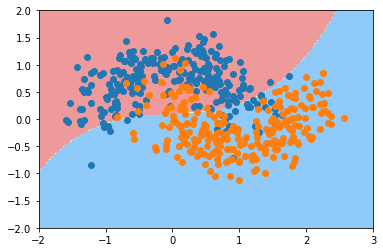

In [50]:
plot_decision_boundary(poly_log_reg7, axis=[-2, 3, -2, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [51]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [53]:
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

0.872

In [54]:
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.872

### 使用网格搜索

In [ ]:
from sklearn.model_selection import GridSearchCV

C_PARM = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [
    {
        'degree': [i for i in range(1, 11)], 
        'C': [i for i in C_PARM]
    }
]

grid_search = GridSearchCV(log_reg, param_grid)
grid_search.fit(X_train,y_train)